# OneTrickFan Summary
## Simple Classification
This notebook will attempt to classify images received from the various League streams to identify whether or not the champion icons are being shown

Simple is just to help sort the data from when we download a large number (50+) videos and convert sorted by champion.  Presently, we are ignoring support champs (because it gets cut off), but we need to fix that.

### Step 1: Setup

In [3]:
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [4]:
import fastai
fastai.__version__

'1.0.52'

Check to make sure we are using the GPU.

In [5]:
import torch

print(torch.cuda.current_device())
print(torch.cuda.device(0))
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.is_available())


0
1
GeForce RTX 2070
True


In [6]:
# This file contains all the main external libs we'll use
from fastai.imports import *
from fastai.vision import *

## Step 2: Setup

In [7]:
import os
os.listdir("Train")

['yes', 'no', 'models']

In [8]:
tfms = get_transforms(flip_vert = False)

In [9]:
data = ImageList.from_folder("Train")


In [10]:
data = data.split_by_rand_pct()
data = data.label_from_folder()
data = data.transform(tfms, size=224)
data = data.databunch()
data = data.normalize()

In [11]:
data

ImageDataBunch;

Train: LabelList (3277 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yes,yes,yes,yes,yes
Path: Train;

Valid: LabelList (819 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
yes,yes,yes,yes,yes
Path: Train;

Test: None

In [12]:
data.show_batch(3, figsize=(6,6), hide_axis=False)

## Step 3: Model

In [13]:
from fastai.metrics import error_rate
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [16]:
defaults.device = torch.device('cuda')
learn.fit_one_cycle(4)

In [17]:
learn.unfreeze()

In [18]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


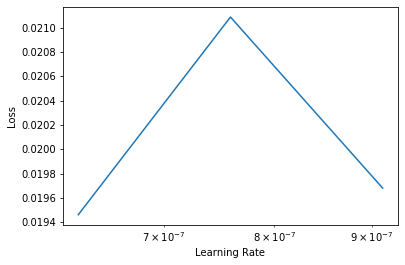

In [19]:
learn.recorder.plot()

In [20]:
learn.fit_one_cycle(4)

In [21]:
learn.save("onetrickfan-simple-1")

## Step 4: Look into the Data

In [24]:
from fastai.widgets import *

ds, idxs = DatasetFormatter().from_toplosses(learn)
ImageCleaner(ds, idxs, "Train")

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())

This is just incorrectly labelled data

In [25]:
interp = ClassificationInterpretation.from_learner(learn)

In [26]:
interp.plot_confusion_matrix()

Time for some simple spot checks

In [27]:
os.listdir("Valid")

['yes', 'no']

In [28]:
import glob

In [29]:
for fname in glob.glob("Valid/yes/*.jpg"):
    print(learn.predict(open_image(fname)))

(Category yes, tensor(1), tensor([4.1946e-04, 9.9958e-01]))
(Category yes, tensor(1), tensor([3.0105e-04, 9.9970e-01]))
(Category yes, tensor(1), tensor([3.2973e-04, 9.9967e-01]))
(Category yes, tensor(1), tensor([2.6475e-04, 9.9974e-01]))
(Category yes, tensor(1), tensor([8.8395e-04, 9.9912e-01]))
(Category yes, tensor(1), tensor([3.1524e-04, 9.9968e-01]))


In [31]:
for fname in glob.glob("Valid/no/*.jpg"):
    print(learn.predict(open_image(fname))[0])

no
no
no
no
no
no
no
no
no
no
no


Looks good to me!

## Simple Model Final Thoughts
This was a pretty easy model - pretty straightforward. 